<a href="https://colab.research.google.com/github/ZOORoman/MMO/blob/master/Lab3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Лабораторная работа №3
Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.
 

В чем состоит проблема:
Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будут с ними работать. Даже корреляционная матрица не будет строиться корректно.
Большинство алгоритмов машинного обучения требуют явного перекодирования категориальных признаков в числовые. Даже если алгоритм не требует этого явно, такое перекодирование возможно стоит попробовать, чтобы повысить качество модели.
Большинство алгоритмов показывает лучшее качество на отмасштабированных признаках, в особенности алгоритмы, использующие методы градиентного спуска.

## Загружаем окружение

In [10]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
!pip install -U pandasql

  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [22]:
file_list = drive.ListFile({'q': "'1FV3XZb9X25mBGBhYOsmg5eyeuJKSnNLp' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Lab3_ML.ipynb, id: 1xdQNxQ2dgCViX-CXZ868_45uMSIk6b2J
title: Lab2.ipynb, id: 1o_oc0tVqH1g7f20VO4KHWHp_EI22qOWZ
title: Car_sales.csv, id: 1pyjVt2gqHh5hjC1FLfmjufqcI-Z9R1qM
title: acquisitions.csv, id: 1Kgu1uC8SvfxR7_CvMQVnlM9Grn9diWmB
title: Lab_3.ipynb, id: 10R8jBt1MxTSxsffPxly9oYE62TVLr-Er
title: Lab4_ПИС.ipynb, id: 1cS3910I-7GvbF7QCjJ3eEHAkniblJlNQ
title: Lab4.ipynb, id: 19IAv1uK5a3TTH4xHbRD-8huPwOSfvOu2
title: Laba4-1.ipynb, id: 1PvDuiwkf4izmrtfF6qIDHUeYOs-zukqg
title: Laba4.ipynb, id: 1OOjK_ZhFSU4kMK9Z5xuPhOC9mqvvAMzr
title: Lab_2.ipynb, id: 1_6mhCs2nbhdQ-CUVQfMn3WjaPxAA5Hsf
title: summer.csv, id: 117EvqN7ZQtIfntEWtdz42OjFnoNdnslR
title: adult.data.csv, id: 11N8YVg6fMtyhlH2D8M796Tkq8y--BmS7
title: winter.csv, id: 1Se6oWEujEmZtmnJvcDu9NGKXfG7_DX-v
title: dictionary.csv, id: 1CEYqFeTOOPPVFIYuZZ9otX7_FWP0FE-e
title: Untitled0.ipynb, id: 1ZaK9MlO2BoShs3HrsLG7yKxV59D-ENR8
title: Untitled1.ipynb, id: 1SoUTcCgftv5MMqW6BpPQ17q3o-yE6Fku
title: lab1.ipynb, id: 1JShiElAnfCA9MXqoRw-mHksD

In [0]:
!pip install -q matplotlib-venn

In [26]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 131304 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...


In [27]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

Name: tensorflow
Version: 1.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: wheel, numpy, protobuf, absl-py, tensorflow-estimator, tensorboard, termcolor, grpcio, astor, gast, six, keras-preprocessing, keras-applications
Required-by: stable-baselines, magenta, fancyimpute
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.13.1)
    100% |████████████████████████████████| 35.0MB 1.0MB/s 
    100% |████████████████████████████████| 245kB 35.6MB/s 
    100% |████████████████████████████████| 890kB 13.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built markdown h

    100% |████████████████████████████████| 107.7MB 319kB/s 
    100% |████████████████████████████████| 481kB 13.6MB/s 
    100% |████████████████████████████████| 3.1MB 10.0MB/s 
    100% |████████████████████████████████| 61kB 29.0MB/s 
    100% |████████████████████████████████| 92kB 21.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/89/67/41/63cbf0f6ac0a6156588b9587be4db5565f8c6d8ccef98202fc
Successfully built wrapt
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
tensorflow 1.2.0 has requirement markdown==2.2.0, but you'll have markdown 3.1 which is incompatible.
stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but you'll have tensorflow 1.2.0 which is incompatible.
magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.2.0 which is incompatible.
  Found existing installation: Markdown 2.2.0
    Uninstalling Markdown-2.2.0:
      Successfully uninstalled Markdown-2.2.0
  Found existing 

In [28]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 131309 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.3) ...


In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [30]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 131365 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
test_downloaded = drive.CreateFile({'id': '1Kgu1uC8SvfxR7_CvMQVnlM9Grn9diWmB'})
test_downloaded.GetContentFile('acquisitions.csv')  

## Работа с данными

In [33]:
companies = pd.read_csv('acquisitions.csv', sep=',')
companies.head(10)

,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
0,ACQ99,November,11.0,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google
1,ACQ98,November,11.0,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google
2,ACQ97,December,8.0,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM
3,ACQ96,December,18.0,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft
4,ACQ95,December,21.0,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft
5,ACQ94,January,7.0,2016,Emotient,Emotion recognition,USA,NaN,"Face ID, Animoji[100]",Apple
6,ACQ93,January,15.0,2016,Iris Analytics,Real time transaction fraud detection,GER,NaN,NaN,IBM
7,ACQ92,January,19.0,2016,Teacher Gaming LLC,Education software,FIN,NaN,NaN,Microsoft
8,ACQ915,July,30.0,1987,"Forethought, Inc.",Computer software,USA,14000000.0,NaN,Microsoft
9,ACQ914,March,2.0,1988,Network Innovations,Software,USA,NaN,NaN,Apple


In [34]:
companies.shape

(916, 10)

In [35]:
companies.dtypes

AcquisitionID            object
AcquisitionMonth         object
AcquisitionMonthDate    float64
AcquisitionYear           int64
Company                  object
Business                 object
Country                  object
Value (USD)             float64
Derived products         object
ParentCompany            object
dtype: object

**Проверка на пустые значения:**

In [36]:
companies.isnull().sum()
# for column in companies.columns:
#     buf_null = companies[companies[column].isnull()].shape[0]
#     print ('{}-{}'.format(column, buf_null))
    
# acquisition - приобретение, овладение  
# derived products - производные продукты

AcquisitionID             0
AcquisitionMonth          6
AcquisitionMonthDate     33
AcquisitionYear           0
Company                   0
Business                  0
Country                  46
Value (USD)             671
Derived products        515
ParentCompany             0
dtype: int64

**Вывод: по полям AcquisitionMont, AcquisitionMonthDate, Country-46 - пропуски данных небольшие, это не сильно повлияет на анализ**
* По полям Value (USD) и Derived products пропуски более 50% от dataset,сильное влияние

In [37]:
total_count = companies.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 916


## 1. Обработка пропусков в данных
**1.1. Простые стратегии - удаление или заполнение нулями
Удаление колонок, содержащих пустые значения**

In [38]:
data_new_1 = companies.dropna(axis=1, how='any')
(companies.shape, data_new_1.shape)

((916, 10), (916, 5))

In [39]:
data_new_1.head(5)

,AcquisitionID,AcquisitionYear,Company,Business,ParentCompany
0,ACQ99,2015,bebop,Cloud software,Google
1,ACQ98,2015,Fly Labs,Video editing,Google
2,ACQ97,2015,Clearleap,Cloud-based video management,IBM
3,ACQ96,2015,Metanautix,Big Data Analytics,Microsoft
4,ACQ95,2015,"Talko, Inc.",Mobile communications,Microsoft


In [40]:
data_new_1.shape

(916, 5)

 **Удаление строк, содержащих пустые значения**

In [41]:
data_new_2 = companies.dropna(axis=0, how='any')
(companies.shape, data_new_2.shape)

((916, 10), (114, 10))

In [42]:
data_new_2.head(5)

,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
0,ACQ99,November,11.0,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google
38,ACQ889,February,7.0,1997,NeXT,Unix-like hardware and software platform,USA,404000000.0,"Mac OS X, iOS, macOS, tvOS, watchOS",Apple
47,ACQ880,October,8.0,1997,Four11,Web-based email,USA,92000000.0,Yahoo! Mail,Yahoo
55,ACQ873,June,8.0,1998,Viaweb,Web application,USA,48600000.0,Yahoo! Store,Yahoo
56,ACQ872,July,17.0,1998,Webcal,Calendaring software,USA,21000000.0,Yahoo Calendar,Yahoo


In [43]:
data_new_2.shape

(114, 10)

**Заполнение всех пропущенных значений нулями**
* В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки

In [44]:
data_new_3 = companies.fillna(0)
data_new_3.isnull().sum()

AcquisitionID           0
AcquisitionMonth        0
AcquisitionMonthDate    0
AcquisitionYear         0
Company                 0
Business                0
Country                 0
Value (USD)             0
Derived products        0
ParentCompany           0
dtype: int64

## 1.2. "Внедрение значений" - импьютация (imputation)
**1.2.1. Обработка пропусков в числовых данных**

* Импьютация - процесс замены пропущенных, некорректных или несостоятельных значений другими значениями
* Выберем числовые колонки с пропущенными значениями
* Цикл по колонкам датасета
* Выберем числовые колонки с пропущенными значениями
* Цикл по колонкам датасета

In [45]:
num_cols = []
for col in companies.columns:
    # Количество пустых значений 
    temp_null_count = companies[companies[col].isnull()].shape[0]
    dt = str(companies[col].dtype)
    total_count = companies.shape[0]
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка AcquisitionMonthDate. Тип данных float64. Количество пустых значений 33, 3.6%.
Колонка Value (USD). Тип данных float64. Количество пустых значений 671, 73.25%.


**Фильтр по колонкам с пропущенными значениями**

In [46]:
data_num = companies[num_cols]
data_num

,AcquisitionMonthDate,Value (USD)
0,11.0,3.800000e+08
1,11.0,NaN
2,8.0,NaN
3,18.0,NaN
4,21.0,NaN
5,7.0,NaN
6,15.0,NaN
7,19.0,NaN
8,30.0,1.400000e+07
9,2.0,NaN


**Гистограмма по признакам**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


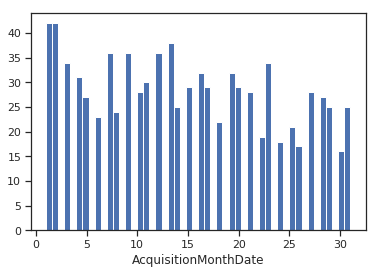

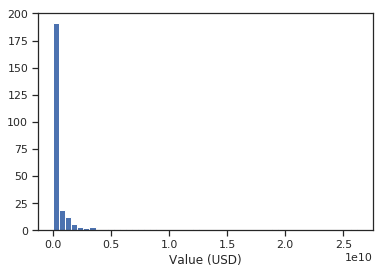

In [47]:
for col in data_num:
    plt.hist(companies[col], 50)
    plt.xlabel(col)
    plt.show()

**Фильтр по пустым значениям поля AcquisitionMonthDate**

In [48]:
 companies[companies['AcquisitionMonthDate'].isnull()]

,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
45,ACQ882,September,NaN,1997,Net Controls,Web search engine,USA,1400000.0,Yahoo! Search,Yahoo
61,ACQ868,December,NaN,1998,Hyperparallel,Data analysis,USA,8100000.0,Yahoo! Search,Yahoo
99,ACQ833,NaN,NaN,2000,SoundJam MP[note 2],Software,USA,NaN,iTunes,Apple
100,ACQ832,NaN,NaN,2001,Bluefish Labs,Productivity software,USA,NaN,iWork,Apple
144,ACQ793,February,NaN,2003,Pyra Labs,Weblog software,USA,NaN,Blogger,Google
149,ACQ789,April,NaN,2003,Applied Semantics,Online advertising,USA,102000000.0,"AdSense, AdWords",Google
150,ACQ788,April,NaN,2003,Neotonic Software,Customer relationship management,USA,NaN,"Google Groups, Gmail",Google
161,ACQ778,October,NaN,2003,Genius Labs,Blogging,USA,NaN,Blogger,Google
162,ACQ777,October,NaN,2003,Sprinks,Online advertising,USA,NaN,"AdSense, AdWords",Google
166,ACQ773,January,NaN,2004,3721 Internet Assistant,Browser Helper Object,CHN,120000000.0,Yahoo! Assistant,Yahoo


**Запоминаем индексы строк с пустыми значениями**

In [49]:
flt_index = companies[companies['AcquisitionMonthDate'].isnull()].index
flt_index

Int64Index([ 45,  61,  99, 100, 144, 149, 150, 161, 162, 166, 182, 184, 198,
            205, 218, 233, 301, 474, 571, 629, 630, 641, 713, 733, 840, 858,
            862, 869, 872, 890, 892, 893, 908],
           dtype='int64')

**Проверяем что выводятся нужные строки**

In [50]:
companies[companies.index.isin(flt_index)]

,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
45,ACQ882,September,NaN,1997,Net Controls,Web search engine,USA,1400000.0,Yahoo! Search,Yahoo
61,ACQ868,December,NaN,1998,Hyperparallel,Data analysis,USA,8100000.0,Yahoo! Search,Yahoo
99,ACQ833,NaN,NaN,2000,SoundJam MP[note 2],Software,USA,NaN,iTunes,Apple
100,ACQ832,NaN,NaN,2001,Bluefish Labs,Productivity software,USA,NaN,iWork,Apple
144,ACQ793,February,NaN,2003,Pyra Labs,Weblog software,USA,NaN,Blogger,Google
149,ACQ789,April,NaN,2003,Applied Semantics,Online advertising,USA,102000000.0,"AdSense, AdWords",Google
150,ACQ788,April,NaN,2003,Neotonic Software,Customer relationship management,USA,NaN,"Google Groups, Gmail",Google
161,ACQ778,October,NaN,2003,Genius Labs,Blogging,USA,NaN,Blogger,Google
162,ACQ777,October,NaN,2003,Sprinks,Online advertising,USA,NaN,"AdSense, AdWords",Google
166,ACQ773,January,NaN,2004,3721 Internet Assistant,Browser Helper Object,CHN,120000000.0,Yahoo! Assistant,Yahoo


**фильтр по колонке**

In [51]:
data_num[data_num.index.isin(flt_index)]['AcquisitionMonthDate']

45    NaN
61    NaN
99    NaN
100   NaN
144   NaN
149   NaN
150   NaN
161   NaN
162   NaN
166   NaN
182   NaN
184   NaN
198   NaN
205   NaN
218   NaN
233   NaN
301   NaN
474   NaN
571   NaN
629   NaN
630   NaN
641   NaN
713   NaN
733   NaN
840   NaN
858   NaN
862   NaN
869   NaN
872   NaN
890   NaN
892   NaN
893   NaN
908   NaN
Name: AcquisitionMonthDate, dtype: float64

**Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute**

In [52]:
data_num_AcquisitionMonthDate = data_num[['AcquisitionMonthDate']]
data_num_AcquisitionMonthDate.head()

,AcquisitionMonthDate
0,11.0
1,11.0
2,8.0
3,18.0
4,21.0


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

**Фильтр для проверки заполнения пустых значений**

In [54]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_AcquisitionMonthDate)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

**С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения**

In [0]:
strategies=['mean', 'median','most_frequent']

In [0]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_AcquisitionMonthDate)
    return data_num_imp[mask_missing_values_only]

In [59]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([14.70215176, 14.70215176, 14.70215176, 14.70215176, 14.70215176,
        14.70215176, 14.70215176, 14.70215176, 14.70215176, 14.70215176,
        14.70215176, 14.70215176, 14.70215176, 14.70215176, 14.70215176,
        14.70215176, 14.70215176, 14.70215176, 14.70215176, 14.70215176,
        14.70215176, 14.70215176, 14.70215176, 14.70215176, 14.70215176,
        14.70215176, 14.70215176, 14.70215176, 14.70215176, 14.70215176,
        14.70215176, 14.70215176, 14.70215176]))

In [60]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
        14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
        14., 14., 14., 14., 14., 14., 14.]))

In [61]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

**Более сложная функция, которая позволяет задавать колонку и вид импьютации**

In [0]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [63]:
companies[['Value (USD)']].describe()

,Value (USD)
count,2.450000e+02
mean,7.584170e+08
std,2.453624e+09
min,2.000000e+05
25%,3.000000e+07
50%,1.020000e+08
75%,4.500000e+08
max,2.620000e+10


In [64]:
test_num_impute_col(companies, 'Value (USD)', strategies[0])

('Value (USD)', 'mean', 671, 758416979.5918367, 758416979.5918367)

In [65]:
test_num_impute_col(companies, 'Value (USD)', strategies[1])

('Value (USD)', 'median', 671, 102000000.0, 102000000.0)

In [66]:
test_num_impute_col(companies, 'Value (USD)', strategies[2])

('Value (USD)', 'most_frequent', 671, 100000000.0, 100000000.0)

## 1.2.2. Обработка пропусков в категориальных данных

In [0]:
cars = pd.read_csv('Car_sales.csv', sep=',')

In [69]:
cars.isnull().sum()

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64

In [71]:
companies2 = pd.read_csv('acquisitions.csv', sep=',')
companies2.head(5)
#companies2.shape

,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
0,ACQ99,November,11.0,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google
1,ACQ98,November,11.0,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google
2,ACQ97,December,8.0,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM
3,ACQ96,December,18.0,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft
4,ACQ95,December,21.0,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft


* Возьмем старый датасет  companies
* Выберем категориальные колонки с пропущенными значениями
* Цикл по колонкам датасета

In [72]:
cat_cols = []
for col in companies2.columns:
    # Количество пустых значений 
    temp_null_count = companies2[companies2[col].isnull()].shape[0]
    dt = str(companies2[col].dtype)
    total_count = companies2.shape[0]
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка AcquisitionMonth. Тип данных object. Количество пустых значений 6, 0.66%.
Колонка Country. Тип данных object. Количество пустых значений 46, 5.02%.
Колонка Derived products. Тип данных object. Количество пустых значений 515, 56.22%.


**Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".**

In [73]:
cat_temp_data = companies2[['Country']]
cat_temp_data.head(2)


,Country
0,USA
1,USA


In [74]:
cat_temp_data['Country']. unique()

array(['USA', 'GER', 'FIN', 'CAN', 'UK', 'SWE', 'ISR', 'TWN', 'AUS',
       'SGP', 'NOR', 'DEN', 'ROU', 'CHN', 'EU', 'IND', 'BLR', 'FRA',
       'BRA', 'ITA', 'SWI', 'SUI', 'CHE', 'NED', 'ESP', 'THA', 'BEL',
       'POR', nan, 'KOR', 'HKG', 'JOR', 'MYS', 'IRL', 'IDN', 'GRE', 'LUX',
       'UKR', 'AUT', 'JPN', 'NZL'], dtype=object)

In [75]:
cat_temp_data[cat_temp_data['Country'].isnull()].shape

(46, 1)

**Импьютация наиболее частыми значениями**

In [76]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['GER'],
       ['FIN'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['CAN'],
       ['USA'],
       ['CAN'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['UK'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['GER'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['CAN'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['CAN'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['GER'],
       ['USA'],
       ['USA'],
       ['

**Пустые значения отсутствуют**

In [77]:
np.unique(data_imp2)

array(['AUS', 'AUT', 'BEL', 'BLR', 'BRA', 'CAN', 'CHE', 'CHN', 'DEN',
       'ESP', 'EU', 'FIN', 'FRA', 'GER', 'GRE', 'HKG', 'IDN', 'IND',
       'IRL', 'ISR', 'ITA', 'JOR', 'JPN', 'KOR', 'LUX', 'MYS', 'NED',
       'NOR', 'NZL', 'POR', 'ROU', 'SGP', 'SUI', 'SWE', 'SWI', 'THA',
       'TWN', 'UK', 'UKR', 'USA'], dtype=object)

In [78]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['GER'],
       ['FIN'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['CAN'],
       ['USA'],
       ['CAN'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['UK'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['GER'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['CAN'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['CAN'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['USA'],
       ['GER'],
       ['USA'],
       ['USA'],
       ['

In [79]:
np.unique(data_imp3)

array(['!!!', 'AUS', 'AUT', 'BEL', 'BLR', 'BRA', 'CAN', 'CHE', 'CHN',
       'DEN', 'ESP', 'EU', 'FIN', 'FRA', 'GER', 'GRE', 'HKG', 'IDN',
       'IND', 'IRL', 'ISR', 'ITA', 'JOR', 'JPN', 'KOR', 'LUX', 'MYS',
       'NED', 'NOR', 'NZL', 'POR', 'ROU', 'SGP', 'SUI', 'SWE', 'SWI',
       'THA', 'TWN', 'UK', 'UKR', 'USA'], dtype=object)

In [80]:
ata_imp3[data_imp3=='!!!'].size

NameError: ignored

In [81]:
#2. Преобразование категориальных признаков
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,USA
1,USA
2,USA
3,USA
4,USA
5,USA
6,GER
7,FIN
8,USA
9,USA


In [0]:
# 2.1. Кодирование категорий целочисленными значениями - label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [84]:
cat_enc['c1'].unique()

array(['USA', 'GER', 'FIN', 'CAN', 'UK', 'SWE', 'ISR', 'TWN', 'AUS',
       'SGP', 'NOR', 'DEN', 'ROU', 'CHN', 'EU', 'IND', 'BLR', 'FRA',
       'BRA', 'ITA', 'SWI', 'SUI', 'CHE', 'NED', 'ESP', 'THA', 'BEL',
       'POR', 'KOR', 'HKG', 'JOR', 'MYS', 'IRL', 'IDN', 'GRE', 'LUX',
       'UKR', 'AUT', 'JPN', 'NZL'], dtype=object)

In [85]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [86]:
le.inverse_transform([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

array(['AUS', 'AUT', 'BEL', 'BLR', 'BRA', 'CAN', 'CHE', 'CHN', 'DEN',
       'ESP', 'EU', 'FIN', 'FRA', 'GER', 'GRE', 'HKG', 'IDN', 'IND',
       'IRL', 'ISR', 'ITA', 'JOR', 'JPN', 'KOR', 'LUX', 'MYS', 'NED',
       'NOR', 'NZL', 'POR', 'ROU', 'SGP', 'SUI', 'SWE', 'SWI', 'THA',
       'TWN', 'UK', 'UKR', 'USA'], dtype=object)

In [87]:
# можно вывести часть значений
le.inverse_transform([0, 1, 2, 3, 4, 5])

array(['AUS', 'AUT', 'BEL', 'BLR', 'BRA', 'CAN'], dtype=object)

In [88]:
# 2.2. Кодирование категорий наборами бинарных значений - one-hot encoding
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(916, 1)

In [89]:
cat_enc_ohe.shape

(916, 40)

In [90]:
cat_enc_ohe

<916x40 sparse matrix of type '<class 'numpy.float64'>'
	with 916 stored elements in Compressed Sparse Row format>

In [91]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [92]:
cat_enc.head(10)

,c1
0,USA
1,USA
2,USA
3,USA
4,USA
5,USA
6,GER
7,FIN
8,USA
9,USA


In [93]:
# 2.3. Pandas get_dummies - быстрый вариант one-hot кодирования
pd.get_dummies(cat_enc).head(10)
# единицы проставляются там, где совпадение значения

,c1_AUS,c1_AUT,c1_BEL,c1_BLR,c1_BRA,c1_CAN,c1_CHE,c1_CHN,c1_DEN,c1_ESP,...,c1_ROU,c1_SGP,c1_SUI,c1_SWE,c1_SWI,c1_THA,c1_TWN,c1_UK,c1_UKR,c1_USA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Country_AUS,Country_AUT,Country_BEL,Country_BLR,Country_BRA,Country_CAN,Country_CHE,Country_CHN,Country_DEN,Country_ESP,...,Country_SGP,Country_SUI,Country_SWE,Country_SWI,Country_THA,Country_TWN,Country_UK,Country_UKR,Country_USA,Country_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [0]:
# попробуем для другого датасета
cat_temp_data2 = companies2[['ParentCompany']]

In [0]:
 # 3. Масштабирование данных
    # Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
    # 3.1. MinMax масштабирование

In [97]:
#возьмем датасет car_sales
cars.head()
cars.shape

(157, 15)

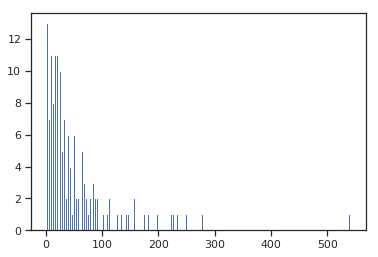

In [98]:
sc2 = StandardScaler()
#cars.dtypes
sc2_data = sc2.fit_transform(cars[['Sales in thousands']])
plt.hist(cars['Sales in thousands'], 157)
plt.show()

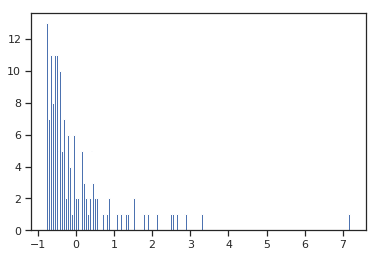

In [99]:
plt.hist(sc2_data, 157)
plt.show()

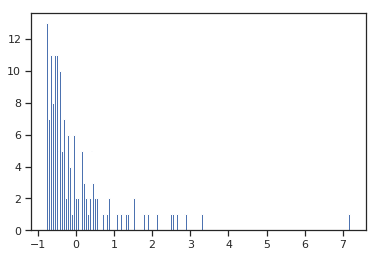

In [100]:
#3.2. Масштабирование данных на основе Z-оценки - StandardScaler
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(cars[['Sales in thousands']])
plt.hist(sc2_data, 157)
plt.show()
# Масштабирование на основе z-оценки похоже на масштабирование MinMax

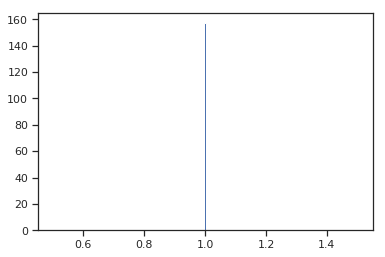

In [101]:
# 3.3. Нормализация данных
sc3 = Normalizer()
sc3_data = sc3.fit_transform(cars[['Sales in thousands']])
plt.hist(sc3_data, 157)
plt.show()